In [1]:
##SHOPPING CUSTOMER SEGMENTATION (Unsupervised Machine Learning Project) USING K-MEANS CLUSTERING.

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Exploratory Data Analysis

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

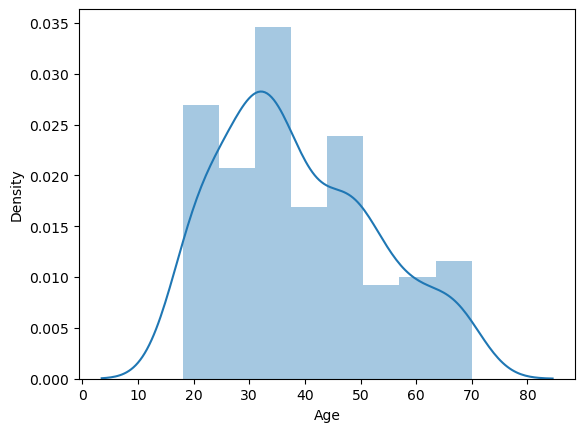

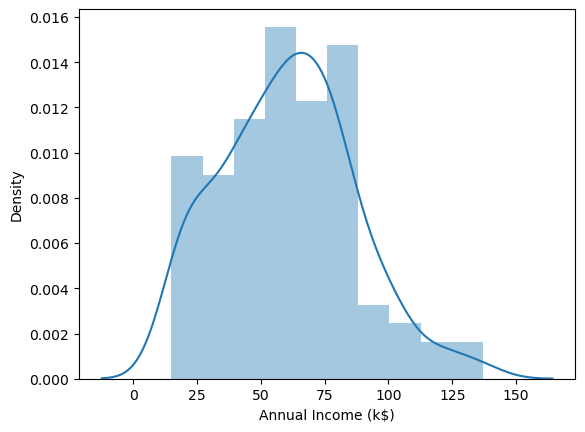

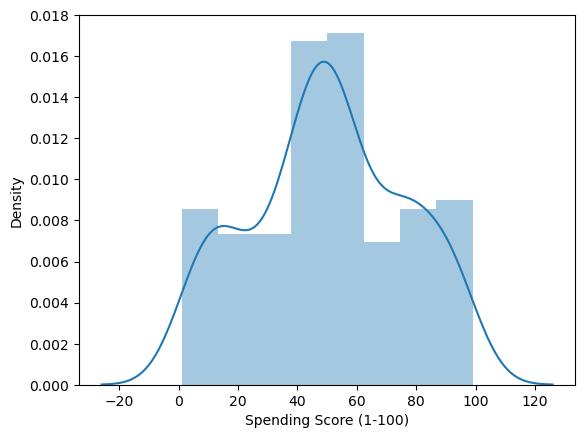

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

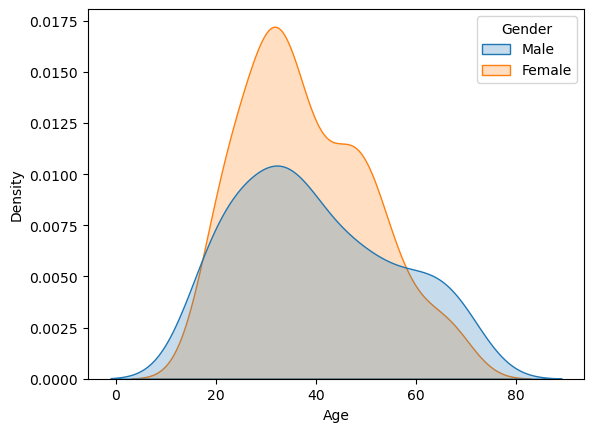

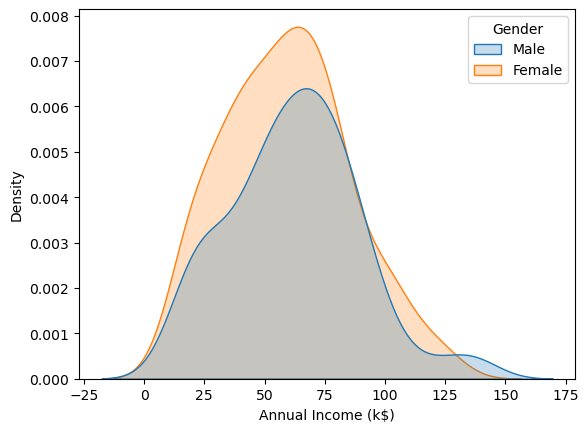

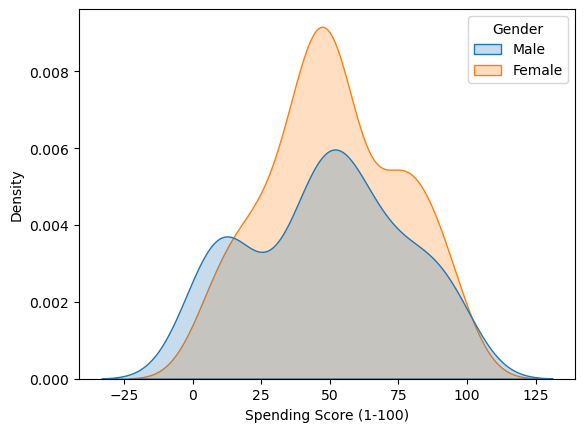

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i,hue='Gender', shade=True);

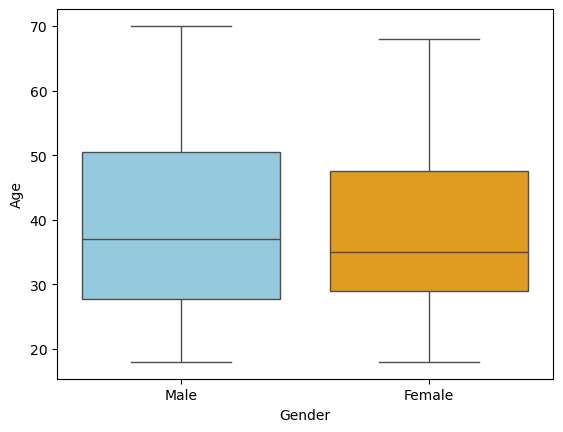

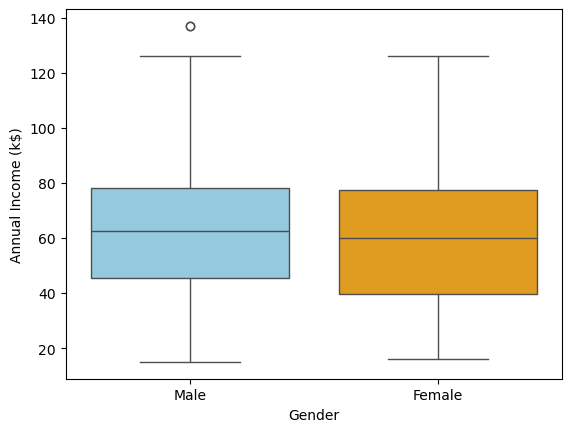

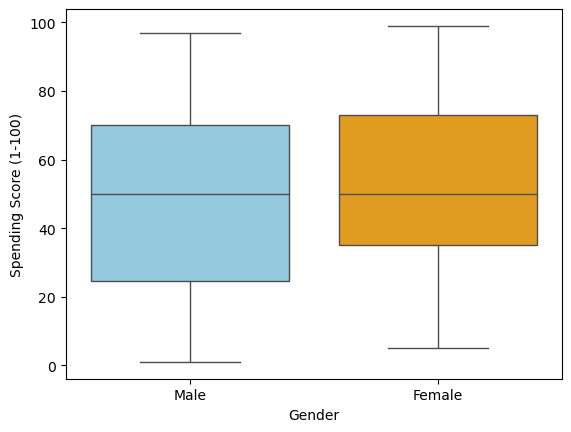

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    palette = {'Male': 'skyblue', 'Female': 'orange'}
    sns.boxplot(data=df, x='Gender',y=df[i],palette=palette);

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

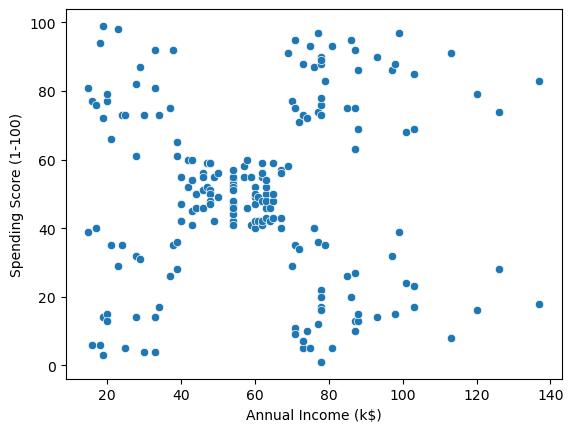

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)')

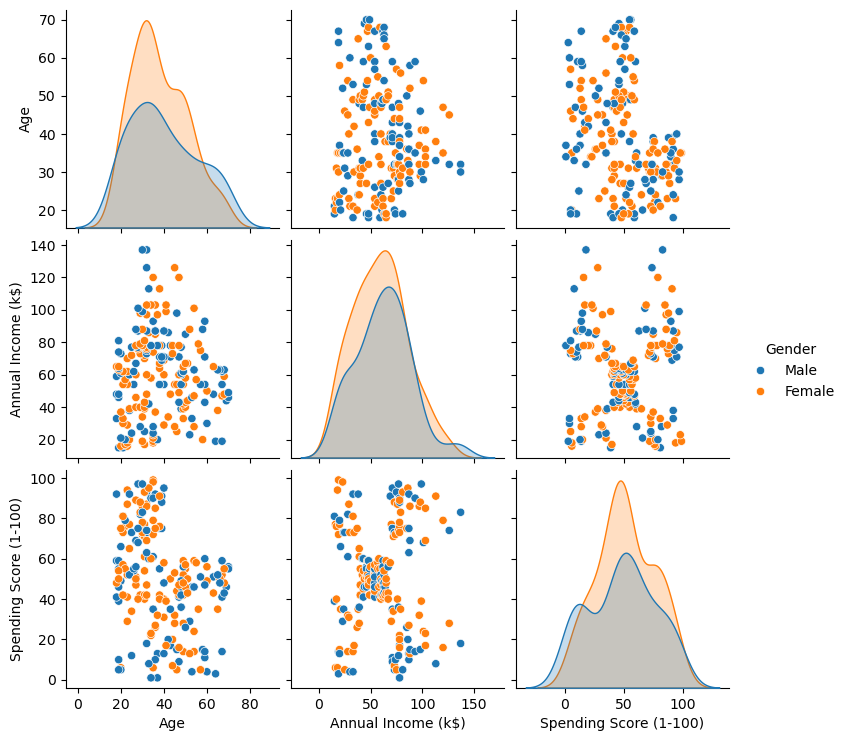

In [24]:
df= df.drop(['CustomerID'], axis=1)
sns.pairplot(df,hue='Gender')

In [14]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [28]:
df_dropped = df.drop(['Gender'], axis=1)
df_dropped.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

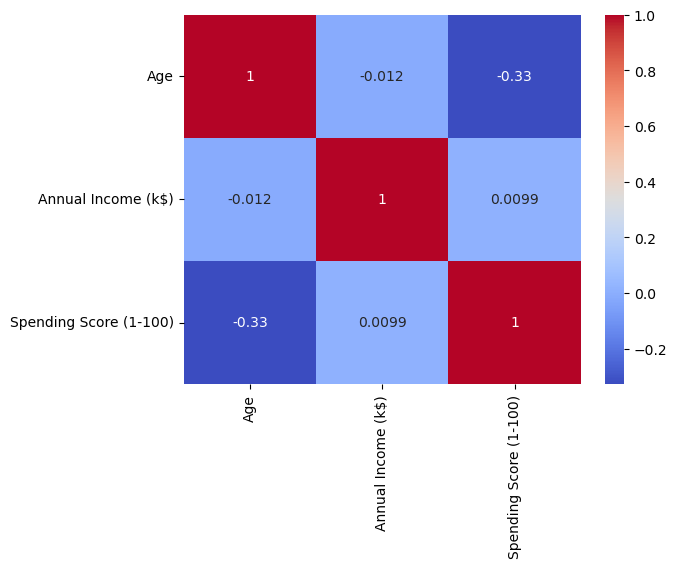

In [30]:
sns.heatmap(df_dropped.corr(),annot=True,cmap='coolwarm')

In [32]:
##KMEANS CLUSTERING

In [34]:
clustering1= KMeans(n_clusters=3)

In [36]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [37]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [38]:
df['Income Cluster']=clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [42]:
df['Income Cluster'].value_counts()

Income Cluster
2    86
1    58
0    56
Name: count, dtype: int64

In [44]:
clustering1.inertia_

25640.457784396833

In [46]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [47]:
inertia_scores

[137277.28000000003,
 49761.73701298701,
 23517.330930930926,
 14647.235170393067,
 8481.496190476191,
 5795.492712550607,
 3984.907059314956,
 2857.441697191697,
 2234.450395682749,
 1786.2085081585083]

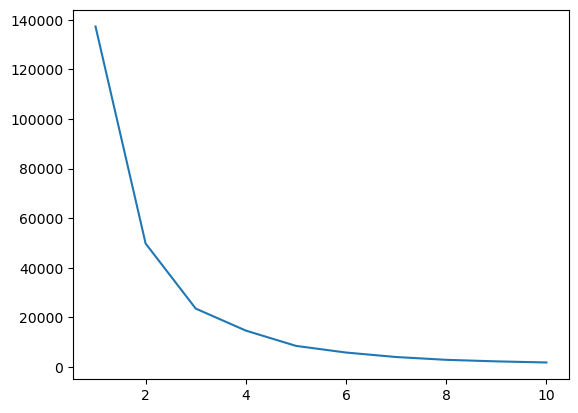

In [70]:
plt.plot(range(1,11),inertia_scores);

In [52]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [56]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.910714,92.142857,50.517857
1,37.120690,29.551724,49.689655
2,41.279070,60.906977,50.337209


In [58]:
#BIVARIATE CLUSTERING

In [162]:
from sklearn.preprocessing import StandardScaler

In [168]:
scaler= StandardScaler()

In [172]:
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [174]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,-1.738999,-0.434801,1,0
1,Male,21,-1.738999,1.195704,1,3
2,Female,20,-1.700830,-1.715913,1,0
3,Female,23,-1.700830,1.040418,1,3
4,Female,31,-1.662660,-0.395980,1,0


In [188]:
clustering= KMeans(n_clusters=4)
clustering.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,-1.738999,-0.434801,1,3
1,Male,21,-1.738999,1.195704,1,0
2,Female,20,-1.700830,-1.715913,1,3
3,Female,23,-1.700830,1.040418,1,0
4,Female,31,-1.662660,-0.395980,1,3


In [190]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)


In [191]:
inertia_scores2

[400.0000000000001,
 270.8923594673905,
 157.70400815035947,
 108.9213166136436,
 65.57885579985049,
 55.114225765284246,
 49.97805051988058,
 42.010510749742565,
 34.81042800928956,
 29.06738750670294]

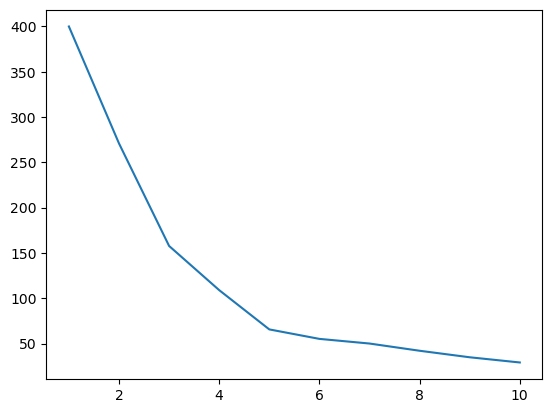

In [192]:
plt.plot(range(1,11),inertia_scores2);

In [193]:
centers=pd.DataFrame(clustering.cluster_centers_)
centers.columns=['x','y']

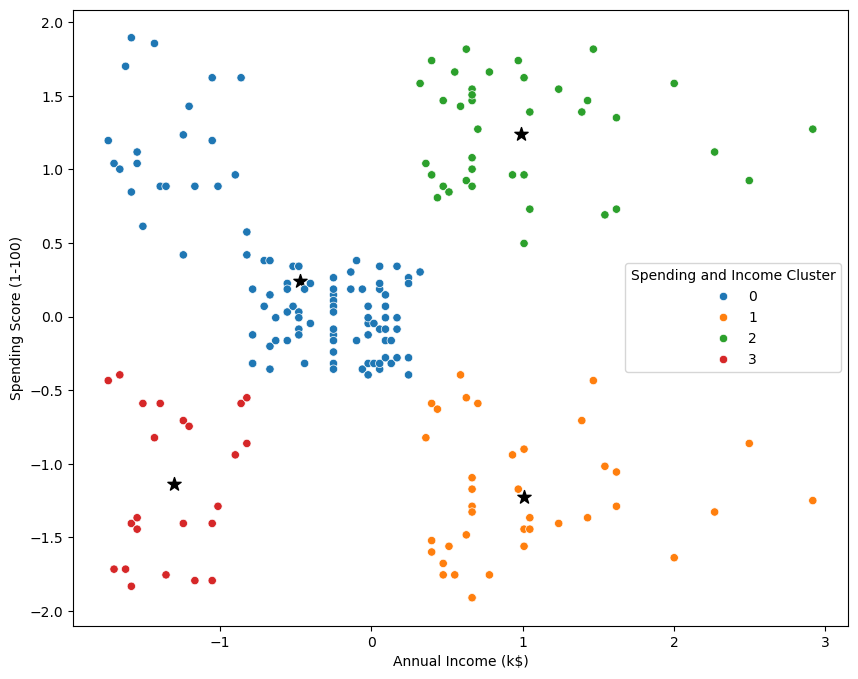

In [213]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x=	'Annual Income (k$)', y= 'Spending Score (1-100)', hue= 'Spending and Income Cluster', palette='tab10')
plt.savefig('Bivariate KMeans Clustering.png')

In [195]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590000,0.410000
1,0.473684,0.526316
2,0.538462,0.461538
3,0.608696,0.391304


In [196]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,39.200000,-0.469484,0.243799
1,40.394737,1.009200,-1.225535
2,32.692308,0.991583,1.239503
3,45.217391,-1.307519,-1.136965


In [197]:
df[df['Gender'] == 'Female'].groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,37.983051,-0.472292,0.238983
1,41.388889,1.087659,-1.027909
2,32.190476,0.972848,1.221585
3,43.214286,-1.267334,-1.105860


In [198]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,-1.738999,-0.434801,1,3
1,Male,21,-1.738999,1.195704,1,0
2,Female,20,-1.700830,-1.715913,1,3
3,Female,23,-1.700830,1.040418,1,0
4,Female,31,-1.662660,-0.395980,1,3


In [209]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,-1.738999,-0.434801,1,3
1,Male,21,-1.738999,1.195704,1,0
2,Female,20,-1.700830,-1.715913,1,3
3,Female,23,-1.700830,1.040418,1,0
4,Female,31,-1.662660,-0.395980,1,3
...,...,...,...,...,...,...
195,Female,35,2.268791,1.118061,0,2
196,Female,45,2.497807,-0.861839,0,1
197,Male,32,2.497807,0.923953,0,2
198,Male,32,2.917671,-1.250054,0,1


In [211]:
df.to_csv('Clustering.csv')